In [1]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer='/kaggle/input/worlds-real-estate-data147k/world_real_estate_data(147k).csv')
df['total_area_m2'] = df['apartment_total_area'].apply(func=lambda x: x if not isinstance(x, str) else int(x.split()[0]))
df['living_area_m2'] = df['apartment_living_area'].apply(func=lambda x: x if not isinstance(x, str) else int(x.split()[0]))
df['per_sq_m'] = df['price_in_USD'] / df['total_area_m2']
df.head()

title   country  \
0  2 room apartment 120 m² in Mediterranean Regio...    Turkey   
1              4 room villa 500 m² in Kalkan, Turkey    Turkey   
2          1 room apartment 65 m² in Antalya, Turkey    Turkey   
3             1 room apartment  in Pattaya, Thailand  Thailand   
4             2 room apartment  in Pattaya, Thailand  Thailand   

                                    location  building_construction_year  \
0               Mediterranean Region, Turkey                         NaN   
1  Kalkan, Mediterranean Region, Kas, Turkey                      2021.0   
2      Mediterranean Region, Antalya, Turkey                         NaN   
3      Chon Buri Province, Pattaya, Thailand                      2020.0   
4      Chon Buri Province, Pattaya, Thailand                      2026.0   

   building_total_floors  apartment_floor  apartment_rooms  \
0                    5.0              1.0              3.0   
1                    2.0              NaN              NaN   
2                    5.0              2.0              2.0   
3                   15.0              5.0              2.0   
4                    8.0              3.0              3.0   

   apartment_bedrooms  apartment_bathrooms apartment_total_area  \
0                 2.0                  2.0               120 m²   
1                 NaN                  NaN               500 m²   
2                 1.0                  1.0                65 m²   
3                 1.0                  1.0                  NaN   
4                 2.0                  1.0                  NaN   

  apartment_living_area  price_in_USD  \
0                110 m²      315209.0   
1                480 m²     1108667.0   
2                 60 m²      173211.0   
3                 40 m²       99900.0   
4                 36 m²       67000.0   

                                               image  \
0  https://realting.com/uploads/bigSlider/ab3/888...   
1  https://realting.com/uploads/bigSlider/87b/679...   
2  https://realting.com/uploads/bigSlider/030/a11...   
3  https://realting.com/uploads/bigSlider/e9a/e06...   
4  https://realting.com/uploads/bigSlider/453/aa2...   

                                                 url  total_area_m2  \
0  https://realting.com/property-for-sale/turkey/...          120.0   
1  https://realting.com/property-for-sale/turkey/...          500.0   
2  https://realting.com/property-for-sale/turkey/...           65.0   
3  https://realting.com/property-for-sale/thailan...            NaN   
4  https://realting.com/property-for-sale/thailan...            NaN   

   living_area_m2     per_sq_m  
0           110.0  2626.741667  
1           480.0  2217.334000  
2            60.0  2664.784615  
3            40.0          NaN  
4            36.0          NaN

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147536 entries, 0 to 147535
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   title                       147536 non-null  object 
 1   country                     147406 non-null  object 
 2   location                    147405 non-null  object 
 3   building_construction_year  64719 non-null   float64
 4   building_total_floors       68224 non-null   float64
 5   apartment_floor             54592 non-null   float64
 6   apartment_rooms             74178 non-null   float64
 7   apartment_bedrooms          36982 non-null   float64
 8   apartment_bathrooms         55973 non-null   float64
 9   apartment_total_area        141796 non-null  object 
 10  apartment_living_area       27712 non-null   object 
 11  price_in_USD                144961 non-null  float64
 12  image                       147536 non-null  object 
 13  url           

In [3]:
df.nunique()

title                          78292
country                           27
location                        7445
building_construction_year       224
building_total_floors             86
apartment_floor                   70
apartment_rooms                   34
apartment_bedrooms                31
apartment_bathrooms               19
apartment_total_area            1492
apartment_living_area            641
price_in_USD                   49327
image                         113753
url                           147536
total_area_m2                    902
living_area_m2                   552
per_sq_m                      102954
dtype: int64

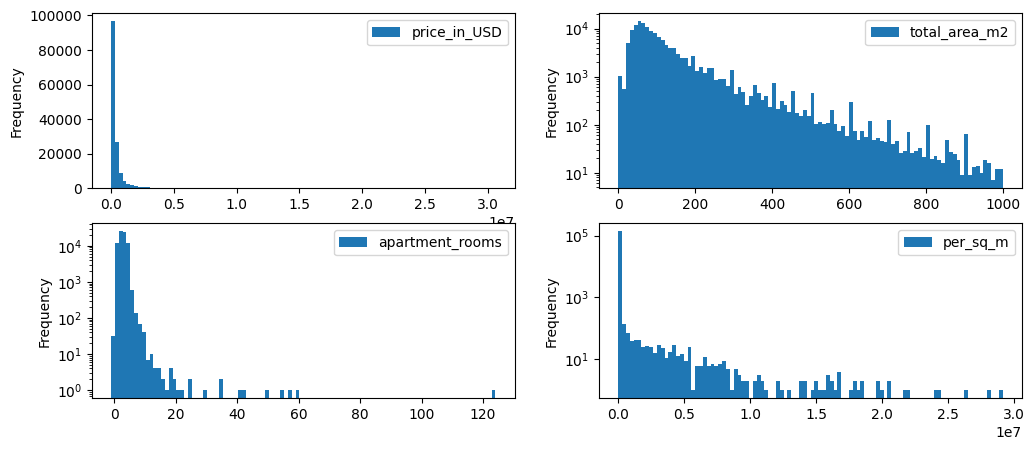

In [4]:
from matplotlib.pyplot import subplots
_, ax = subplots(figsize=(12, 5), ncols=2, nrows=2)
for index, column in enumerate(['price_in_USD', 'total_area_m2', 'apartment_rooms', 'per_sq_m']):
    df[column].plot.hist(ax=ax.ravel()[index], bins=100, legend=True, log=index!=0, )

It is a little surprising how prices cluster near zero.

In [5]:
from plotly.express import scatter
sample_size = min(1000000, len(df[df['price_in_USD'].notnull()]))
scatter(data_frame=df[df['price_in_USD'].notnull()].sample(sample_size), 
        x='country', y='total_area_m2', size='price_in_USD', color='country',
       ).update_layout(showlegend=False).show()

Needless to say the area data seems noisy; I don't believe anyone is paying 5m USD for a one square meter apartment.

In [6]:
sample_size = min(1000000, len(df[df['price_in_USD'].notnull()]))
scatter(data_frame=df[df['price_in_USD'].notnull()].sample(sample_size), 
        x='total_area_m2', y='price_in_USD', color='country',
       ).show()

We have some very odd data here.